# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

##                  machine Learning libraries
# To change the labels of the collumns : 
from sklearn.preprocessing import LabelEncoder

# Random Forest Regressor Project

Decision Tree - 45% -50%

RFR - 92% - 93%

Link: https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/cardekho_data.csv

# Importing the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/cardekho_data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Analysis(EDA, DE, DM, DC, DV)

In [4]:
df.shape

(301, 9)

In [5]:
print("Fuel Type",df.Fuel_Type.unique())
print("Seller Type",df.Seller_Type.unique())
print("Transmission",df.Transmission.unique())
print("Owner Type",df.Owner.unique())

Fuel Type ['Petrol' 'Diesel' 'CNG']
Seller Type ['Dealer' 'Individual']
Transmission ['Manual' 'Automatic']
Owner Type [0 1 3]


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Create a new column "Car_age" where Car_age = current year - year.
That column should show the Car age 

In [8]:
current_year = 2023

add next to the Year column

In [9]:
df.insert(2,'car_age',current_year - df['Year'])

In [10]:
df.head()

,Car_Name,Year,car_age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,9,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,10,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,6,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,12,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,9,4.60,6.87,42450,Diesel,Dealer,Manual,0


Drop the columns 'Car_Name',"Year" 

In [11]:
df.drop(['Car_Name', 'Year'],axis=1, inplace=True)

In [12]:
df.head()

,car_age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,10,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,6,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,12,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,9,4.60,6.87,42450,Diesel,Dealer,Manual,0


changing all values in columns into numeric values to make prediction, etc...

In [16]:
from sklearn.preprocessing import LabelEncoder

In [13]:
df['Fuel_Type'] = LabelEncoder().fit_transform(df['Fuel_Type'])
df['Seller_Type'] = LabelEncoder().fit_transform(df['Seller_Type'])
df['Transmission'] = LabelEncoder().fit_transform(df['Transmission'])

In [14]:
df.head()

,car_age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9,3.35,5.59,27000,2,0,1,0
1,10,4.75,9.54,43000,1,0,1,0
2,6,7.25,9.85,6900,2,0,1,0
3,12,2.85,4.15,5200,2,0,1,0
4,9,4.60,6.87,42450,1,0,1,0


In [15]:
df.shape

(301, 8)

In [16]:
df.corr()

,car_age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
car_age,1.000000,-0.236141,0.047584,0.524342,0.053643,0.039896,-0.000394,0.182104
Selling_Price,-0.236141,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344
Present_Price,0.047584,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057
Kms_Driven,0.524342,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216
Fuel_Type,0.053643,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705
Seller_Type,0.039896,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269
Transmission,-0.000394,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316
Owner,0.182104,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000


Correlation using pair plot

c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


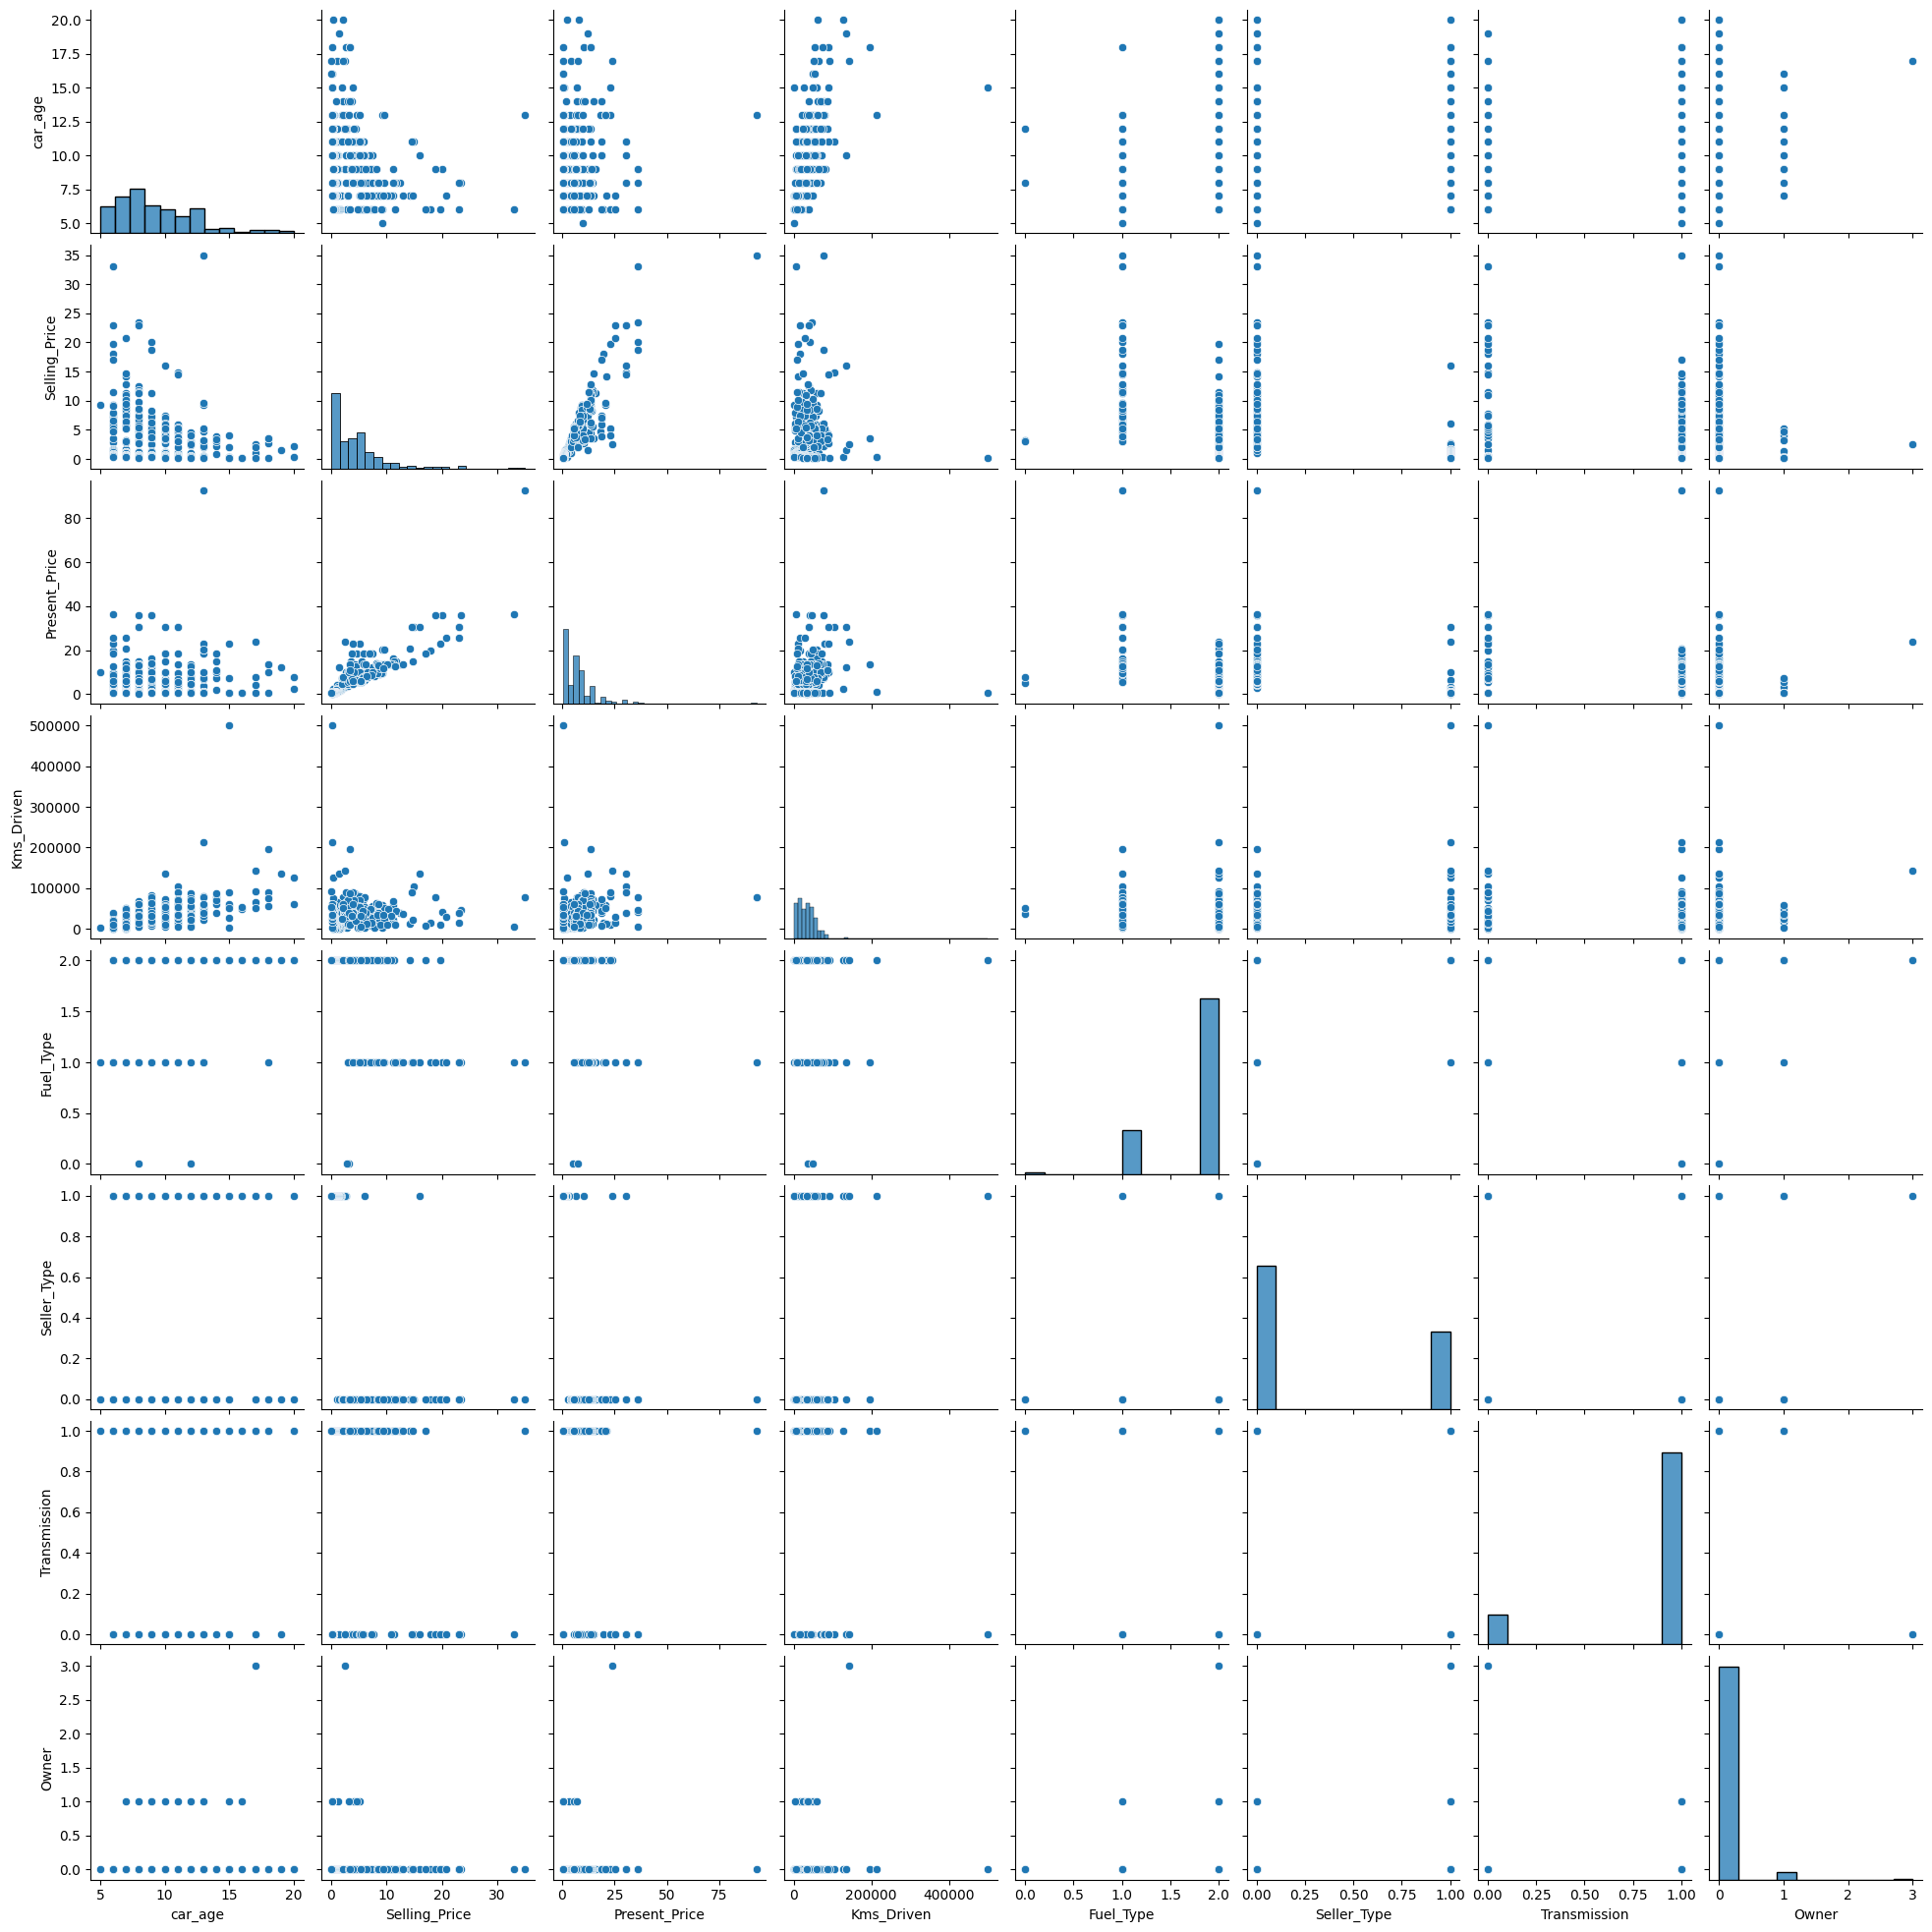

In [17]:
sns.pairplot(df)

HeatMap

<Axes: >

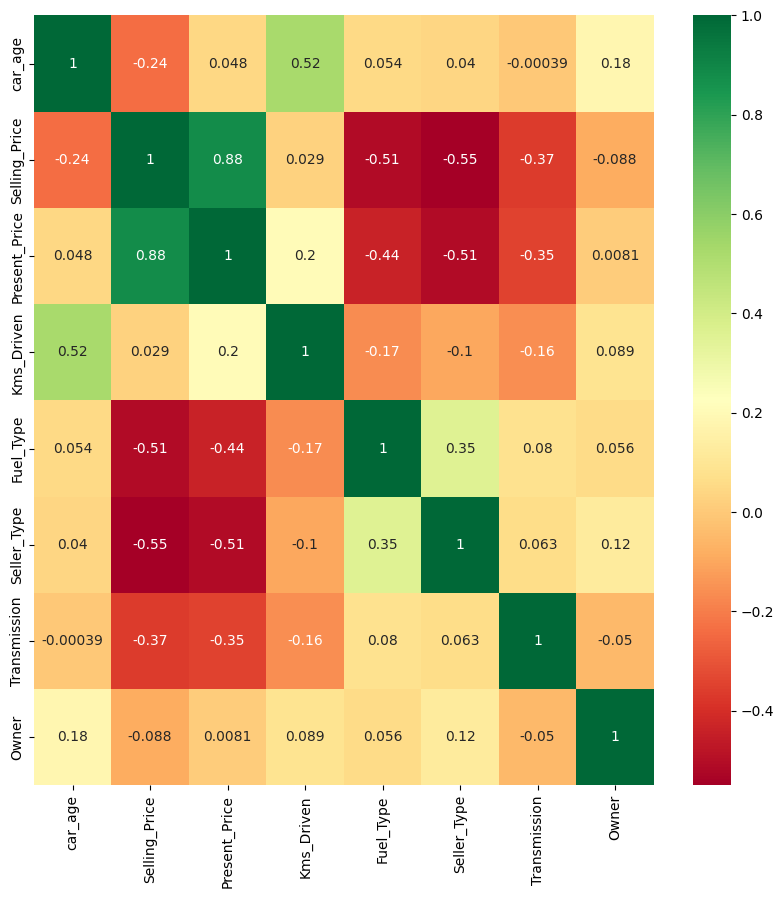

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

In [18]:
df

,car_age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9,3.35,5.59,27000,2,0,1,0
1,10,4.75,9.54,43000,1,0,1,0
2,6,7.25,9.85,6900,2,0,1,0
3,12,2.85,4.15,5200,2,0,1,0
4,9,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,7,9.50,11.60,33988,1,0,1,0
297,8,4.00,5.90,60000,2,0,1,0
298,14,3.35,11.00,87934,2,0,1,0
299,6,11.50,12.50,9000,1,0,1,0


# Feature Selection (Feature Importance)

Set Feature and Target

In [19]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [20]:
x

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,3.35,5.59,27000,2,0,1,0
1,4.75,9.54,43000,1,0,1,0
2,7.25,9.85,6900,2,0,1,0
3,2.85,4.15,5200,2,0,1,0
4,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,9.50,11.60,33988,1,0,1,0
297,4.00,5.90,60000,2,0,1,0
298,3.35,11.00,87934,2,0,1,0
299,11.50,12.50,9000,1,0,1,0


In [21]:
y

0       9
1      10
2       6
3      12
4       9
       ..
296     7
297     8
298    14
299     6
300     7
Name: car_age, Length: 301, dtype: int64

In [23]:
from sklearn.ensemble import ExtraTreesRegressor

chosse model

In [24]:
model = ExtraTreesRegressor()

Fitting the model

In [25]:
feat_imp = model.fit(x,y)

In [26]:
feat_imp.feature_importances_

array([0.25096929, 0.17079786, 0.46832155, 0.04027993, 0.02751284,
       0.01586656, 0.02625197])

<Axes: >

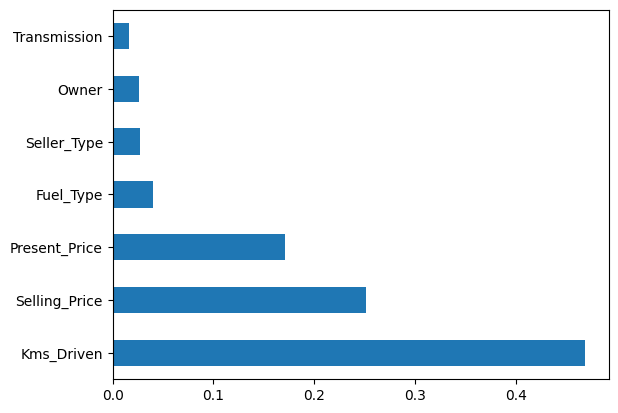

In [27]:
imp = pd.Series(feat_imp.feature_importances_, index=x.columns)
imp.nlargest(7).plot(kind='barh')

# Machine Learning

Splitting the data

In [34]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,
                                                    random_state=0)

In [37]:
X_test

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
223,8.25,9.400,61381,1,0,1,0
150,0.50,0.826,6000,2,1,1,0
226,5.25,5.700,24678,2,0,1,0
296,9.50,11.600,33988,1,0,1,0
52,18.00,19.770,15000,1,0,0,0
...,...,...,...,...,...,...,...
137,0.65,0.787,16000,2,1,1,0
227,2.55,4.430,57000,2,0,1,0
26,4.15,5.870,55138,2,0,1,0
106,1.35,3.450,16500,2,1,1,1


# Model Selection

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
regressor = RandomForestRegressor()

# Hyper Parameter Tuning

In [80]:
n_estimators = [int(i) for i in np.linspace(start=100, stop=1200, num=12)]

max_feature = ['auto','sqrt']

max_depth = [int(i) for i in np.linspace(start=5, stop=30, num=6)]

min_samples_split = [2,5,34,67,200]

min_samples_leaf = [1,2,6,20]



In [81]:
random_grid = {'n_estimators':n_estimators,
               'max_features':max_feature,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 34, 67, 200], 'min_samples_leaf': [1, 2, 6, 20]}


In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
rf_regressor = RandomizedSearchCV(estimator=regressor,
                                  param_distributions=random_grid,
                                  scoring='neg_mean_squared_error',
                                  cv=5,
                                  verbose = 2,
                                  random_state=42,
                                  n_jobs=1)

# Training the model

In [83]:
rf_regressor.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=34, n_estimators=1100; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=34, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=34, n_estimator

c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 6, 20],
                                        'min_samples_split': [2, 5, 34, 67,
                                                              200],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

To find the best params

In [84]:
rf_regressor.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

# Testing the model

In [85]:
y_pred = rf_regressor.predict(X_test)

In [86]:
y_pred

array([ 9.246     ,  8.346     ,  7.7195    ,  7.8425    ,  7.047     ,
        7.292     ,  8.977     ,  7.118     ,  8.696     , 10.289     ,
       10.096     ,  6.256     ,  7.654     ,  7.099     ,  7.4395    ,
        7.384     ,  6.897     ,  8.362     , 11.4908    ,  6.476     ,
       11.188     ,  7.551     ,  8.219     ,  7.575     , 15.411     ,
        7.46      , 12.758     ,  8.656     ,  8.802     , 13.234     ,
       11.1645    ,  8.5535    ,  8.626     ,  7.19      , 13.047     ,
        8.935     ,  7.163     ,  9.159     , 11.389     ,  9.061     ,
        6.592     ,  7.876     ,  6.913     ,  9.129     ,  9.1955    ,
        7.9165    ,  9.67713333,  7.69      , 10.414     ,  8.6245    ,
        7.318     ,  8.571     , 10.391     ,  8.419     ,  8.738     ,
        8.893     ,  7.985     , 10.8735    ,  9.7365    ,  9.218     ,
       12.848     ])

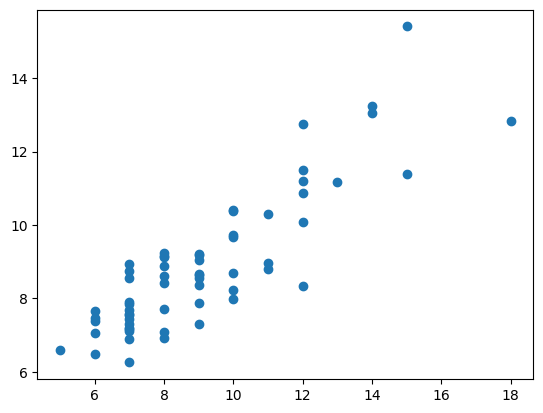

In [87]:
plt.scatter(y_test, y_pred)

In [88]:
finaldf = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})

In [89]:
finaldf

,Actual,Predicted
223,8,9.2460
150,12,8.3460
226,8,7.7195
296,7,7.8425
52,6,7.0470
...,...,...
137,10,7.9850
227,12,10.8735
26,10,9.7365
106,9,9.2180


<Axes: >

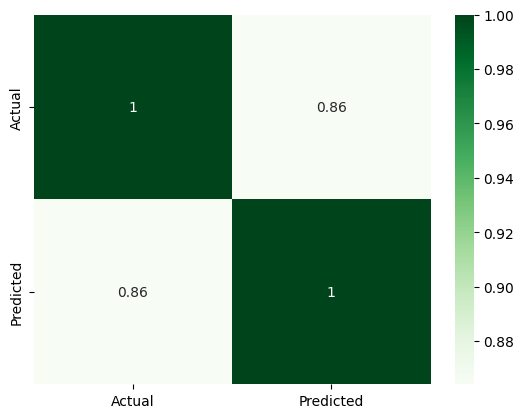

In [90]:
sns.heatmap(finaldf.corr(), annot=True, cmap='Greens')

# Performance/Accuracy

In [93]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [94]:
r2_score(y_test, y_pred)

0.716549819008836

In [95]:
mean_squared_error(y_test,y_pred)

1.9560423938433515

In [96]:
mean_absolute_error(y_test,y_pred)

1.0527715846994534